In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyecharts
%matplotlib inline
plt.figure(figsize=(20,12))
from IPython.display import Image

plt.rcParams['font.family'] = 'AppleGothic'
plt.rc('axes', unicode_minus=False)

df1 = pd.read_csv('/Users/kimminsang/Desktop/2021/데이터베이스응용/NHIS_OPEN_GJ_2018_100.csv')
df2 = pd.read_csv('/Users/kimminsang/Desktop/2021/데이터베이스응용/NHIS_OPEN_GJ_2017_100.csv', encoding='EUC-KR')

df1.shape, df2.shape

((1000000, 34), (1000000, 34))

<Figure size 1440x864 with 0 Axes>

In [2]:
from pyecharts import online
online()

In [3]:
df1.columns # 2017년 18년 columns 같음

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

### 설명
1. 성별코드]
    - 1(남자), 2(여자)
    

2. 연령대코드(5세단위)
 
|그룹|연령대|그룹|연령대|
|:---:|:---:|:---:|:---:|
|1|0~4세|10|45~49세|
|2|5~9세|11|50~54세|
|3|10~14세|12|55~59세|
|4|15~19세|13|60~65세|
|5|20~24세|14|66~69세|
|6|25~29세|15|70~74세|
|7|30~34세|16|75~79세|
|8|35~39세|17|80~84세|
|9|40~44세|18|85세이상|

3. 신장(5Cm단위) (cm)
    - 검진자의 키(5cm 단위)
    

4. 체중(5Kg단위) (kg)
    - 검진자의 몸무게(5kg 단위)


5. 허리둘레 (cm)
    - 검진자의 허리둘레
    

6. 수축기혈압 (mmHg)
    - 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압


7. 이완기혈압 (mmHg)
    - 검진자의 최저 혈압으로 심장의 완기시의 혈압 


8. 식전혈당(공복혈당) (mg/dL)
    - 검진자식사전혈당(혈액100ml당함유되어있는포도당의농도)수치 


9. 요단백 (mg/dL)
    - 소변에 단백질이 섞여 나오는 것
    - 1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)로 표기됨


10. 혈청크레아티닌 (mg/dL)
    - 크레아티닌은 크레아틴의 탈수물로 내인성단백대사의 종말산물로서 신장에서배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함
    - 혈청크레아티닌 농도는 신기능장애에 의해 증량함 
    - 정상치 0.8~1.7mg/dL


11. 흡연상태
    - 해당수검자의흡연상태여부
    - 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)


12. 음주여부
    - 해당수검자의음주상태여부 
    - 0(마시지 않은다), 1(마신다)

In [4]:
df1_1 = df1[['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', 
              '수축기혈압','이완기혈압', '식전혈당(공복혈당)', '요단백', '혈청크레아티닌', '흡연상태',
              '음주여부']]

In [5]:
df1_clean = df1_1.dropna(how="any").copy() #결측값(NaN)을 포함한 행 제거

In [6]:
sex = df1_clean['성별코드'].value_counts()

In [7]:
sex.index

Int64Index([1, 2], dtype='int64')

In [8]:
sex.values

array([414815, 226298])

In [9]:
x = sex.index
y = sex.values
bar = pyecharts.Bar("성별코드", "남자(1), 여자(2)")
bar.add("성별코드", x, y)
bar.height = 500
bar.width = 800
bar

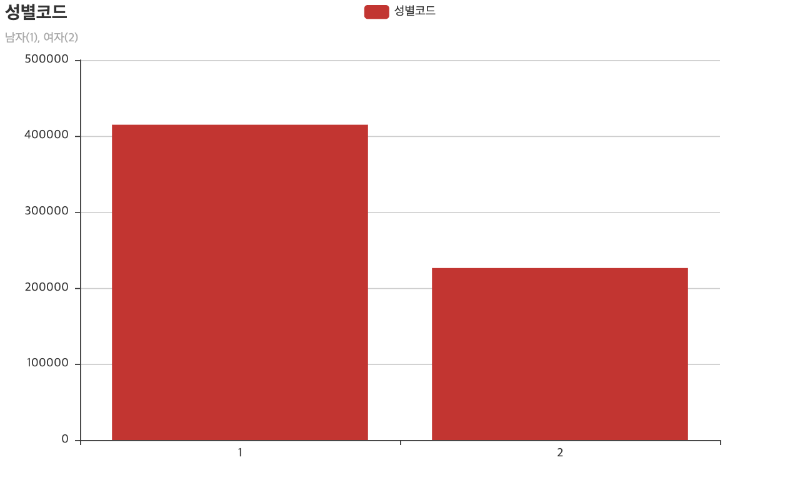

In [10]:
Image('pyecharts(김민상)/성별코드.png')

In [11]:
a = df1_clean['신장(5Cm단위)'].value_counts().sort_index()
x = a.index
y = a.values
bar = pyecharts.Bar("신장(5cm단위)")
bar.add("신장", x, y, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

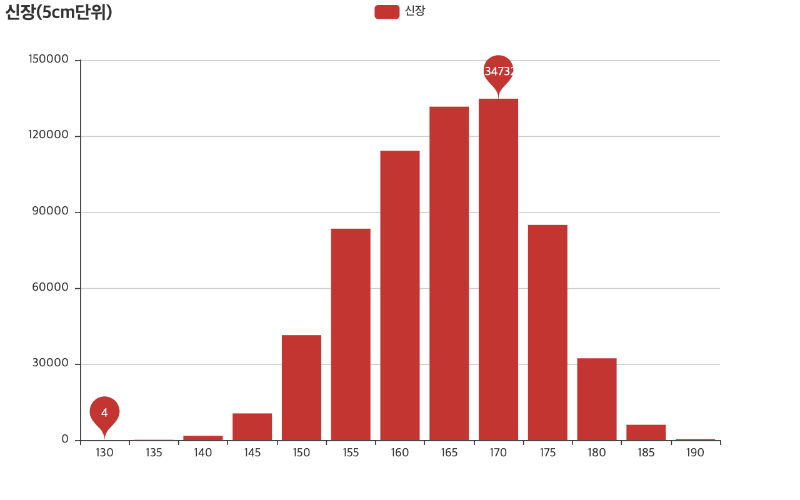

In [12]:
Image('pyecharts(김민상)/신장(5cm단위).png')

In [13]:
a = df1_clean['체중(5Kg단위)'].value_counts().sort_index()
x = a.index
y = a.values
bar = pyecharts.Bar("체중(5Kg단위)")
bar.add("체중", x, y, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

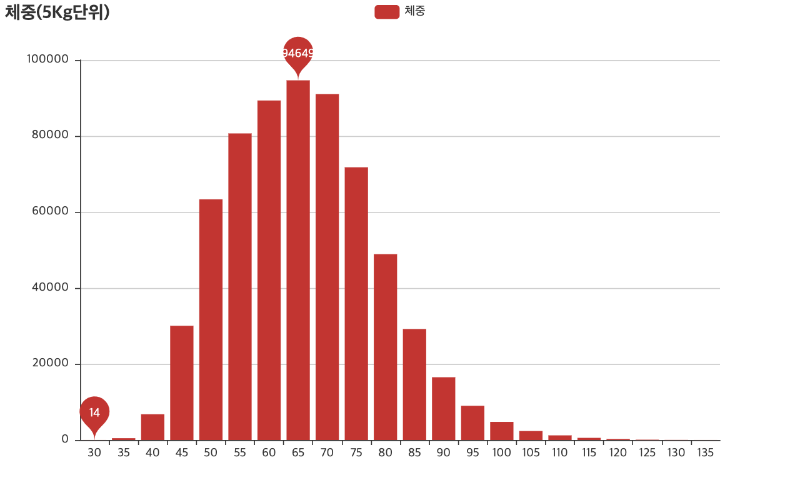

In [14]:
Image('pyecharts(김민상)/체중(5Kg단위).png')

In [15]:
a = df1_clean['허리둘레'].value_counts().sort_index()
x = a.index
y = a.values
bar = pyecharts.Bar("허리둘레")
bar.add("허리둘레", x, y, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

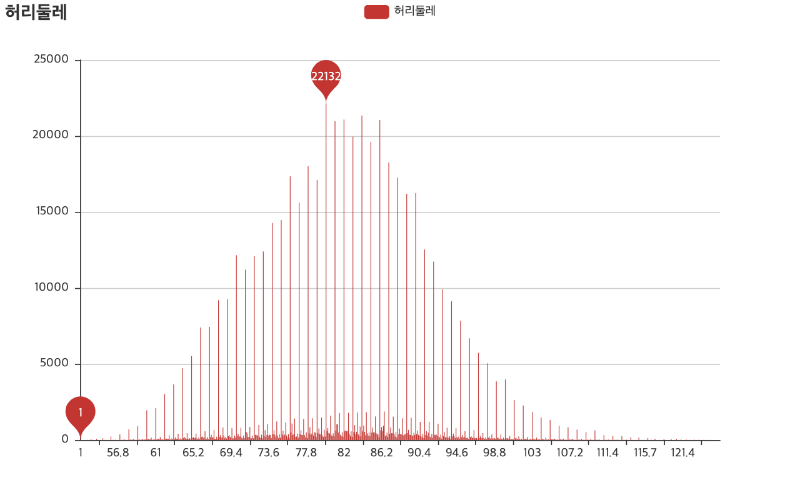

In [16]:
Image('pyecharts(김민상)/허리둘레.png')

허리둘레 값 중 garbage값들 존재(예: 허리둘레 1cm ..등등)

In [17]:
a = df1_clean['수축기혈압'].value_counts().sort_index()
b = df1_clean['이완기혈압'].value_counts().sort_index()
x1 = a.index
x2 = b.index
y1 = a.values
y2 = b.index
bar = pyecharts.Bar("수축 · 이완기혈압")
bar.add("수축기혈압", x1, y1, mark_point=["max", "min"])
bar.add("이완기혈압", x2, y2, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

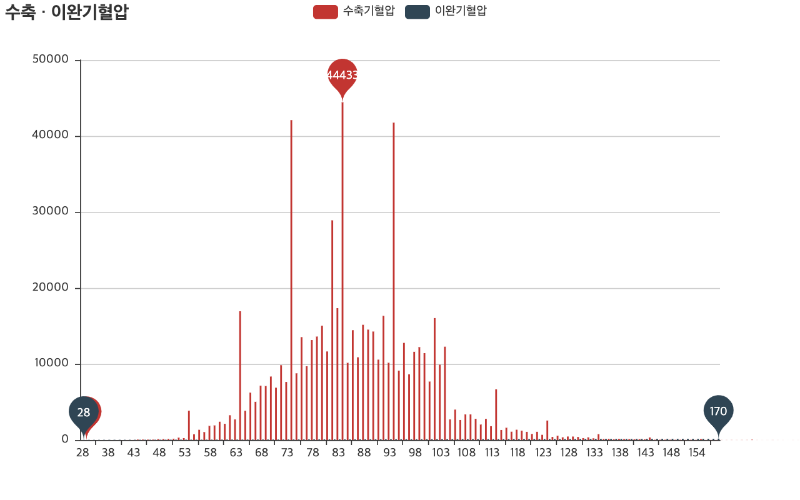

In [18]:
Image('pyecharts(김민상)/수축 · 이완기혈압.png')

혈압 역시 비정상적인 값 존재

In [19]:
a = df1_clean['식전혈당(공복혈당)'].value_counts().sort_index()
x = a.index
y = a.values
bar = pyecharts.Bar("식전혈당(공복혈당)","공복 혈당치 126 mg/dL 이상 당뇨병")
bar.add("식전혈당(공복혈당)", x, y, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

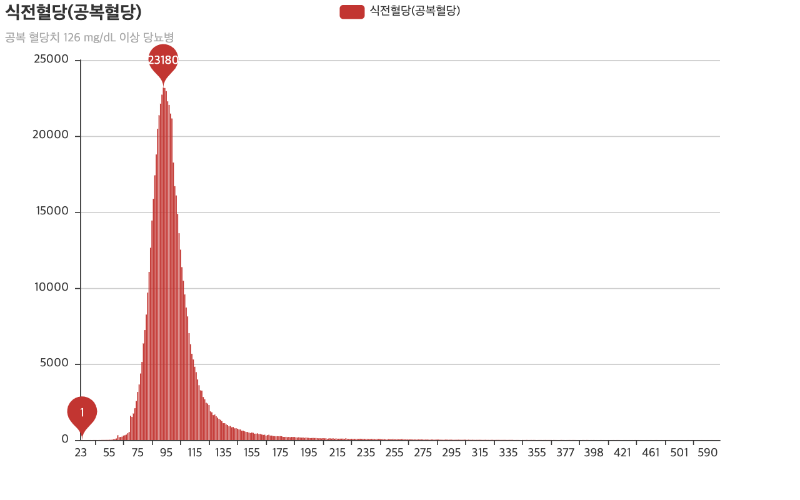

In [20]:
Image('pyecharts(김민상)/식전혈당(공복혈당).png')

식전혈당(공복혈당) 역시 비정상적인 값 존재

In [21]:
a = df1_clean['요단백'].value_counts().sort_index()
x = a.index
y = a.values
bar = pyecharts.Bar("요단백", "1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)로 표기")
bar.add("요단백", x, y, mark_point=["max", "min"])
bar.bheight = 500
bar.width = 800
bar

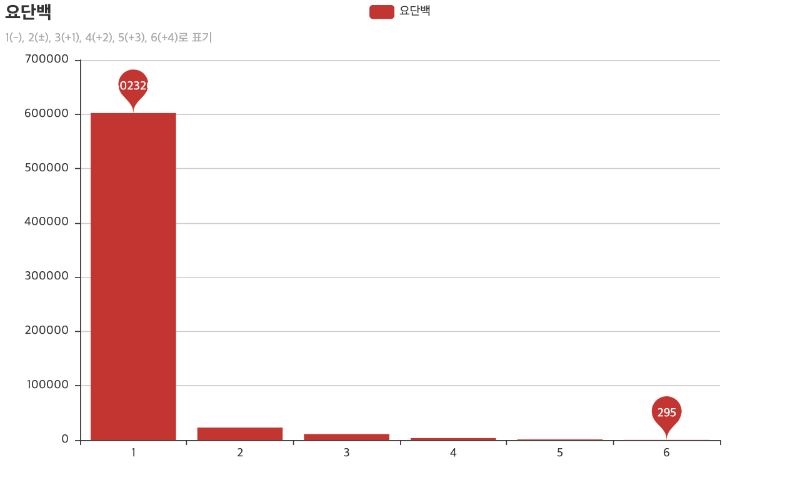

In [22]:
Image('pyecharts(김민상)/요단백.png')

In [23]:
a = df1_clean['혈청크레아티닌'].value_counts().sort_index()
x = a.index
y = a.values
bar = pyecharts.Bar("혈청크레아티닌", "정상치 0.8~1.7mg/dL")
bar.add("혈청크레아티닌", x, y, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

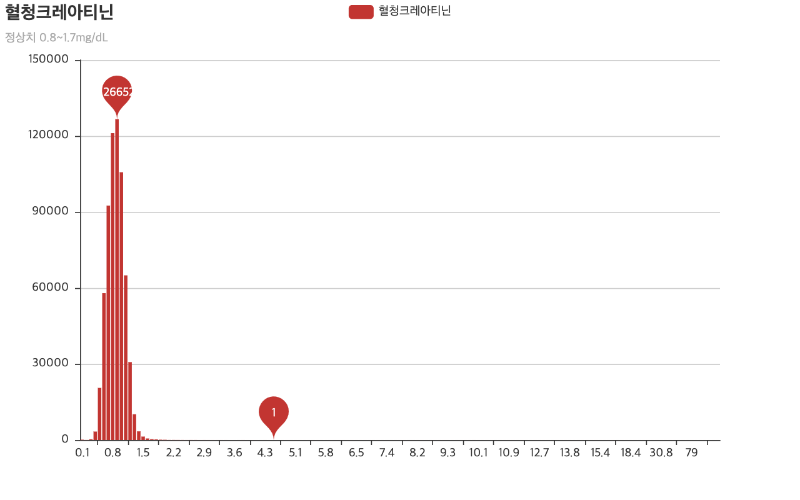

In [24]:
Image('pyecharts(김민상)/혈청크레아티닌.png')

In [25]:
a = df1_clean['흡연상태'].value_counts().sort_index()
x = a.index
y = a.values
pie = pyecharts.Pie("흡연상태", "1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)")
pie.add("흡연상태", x, y, center=[45,45], is_ramdom=True, radius=[30, 80], 
        rosetype='area', is_legend_show=False, is_label_show=True)
pie

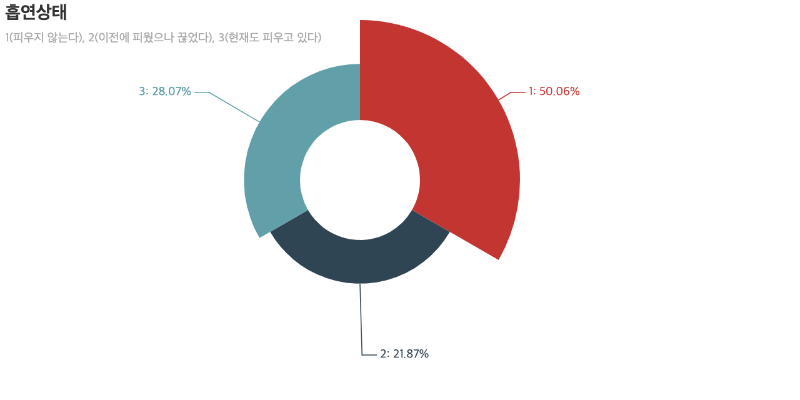

In [26]:
Image('pyecharts(김민상)/흡연상태.png')

In [27]:
a = df1_clean['음주여부'].value_counts().sort_index()
x = a.index
y = a.values
pie = pyecharts.Pie("음주여부", "0(마시지 않는다), 1(마신다)")
pie.add("음주여부", x, y, center=[45,45], is_ramdom=True, radius=[30, 80], 
        rosetype='area', is_legend_show=False, is_label_show=True)
pie

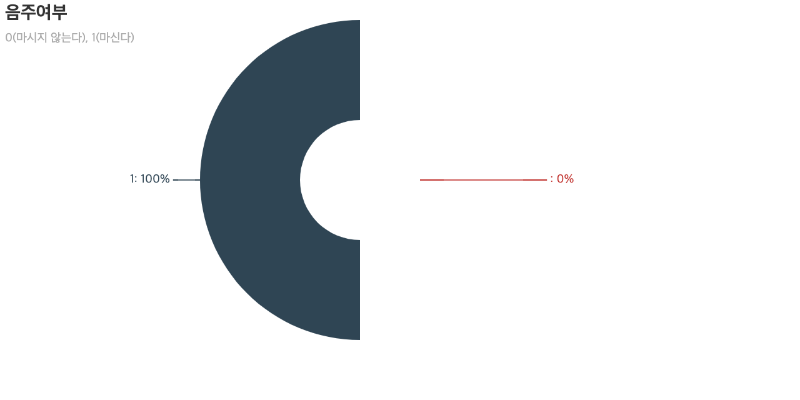

In [28]:
Image('pyecharts(김민상)/음주여부.png')

---
# 상관관계 분석

## 혈당수치와 당뇨
- 공복혈당치 126mg/dL 이상 -> 당뇨
- 공복혈당치 100~125mg/dL -> 고위험군

In [29]:
diabetes = df1_clean['식전혈당(공복혈당)'].copy()
diabetes.loc[diabetes < 100] = 0
diabetes.loc[(diabetes < 126) & (diabetes >= 100)] = 1
diabetes.loc[diabetes >= 126] = 2

In [30]:
a = diabetes.value_counts().sort_index()
x = a.index
y = a.values
pie = pyecharts.Pie("당뇨병유무","0(정상), 1(위험), 2(당뇨)")
pie.add("당뇨병유무", x, y, center=[45,45], is_ramdom=True, radius=[30, 50], 
        rosetype='area', is_legend_show=False, is_label_show=True)
pie

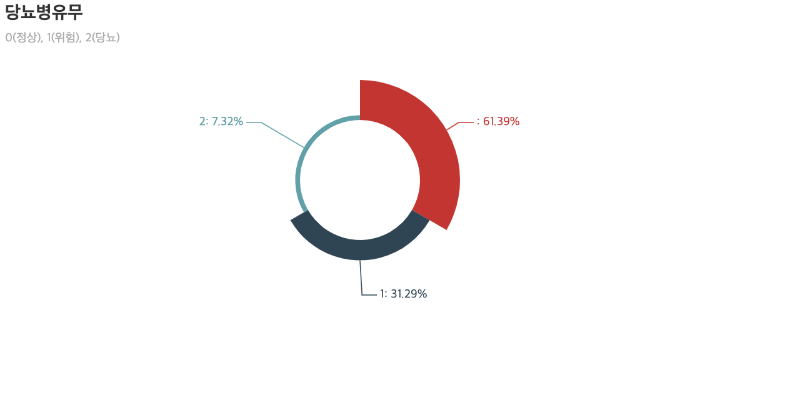

In [31]:
Image('pyecharts(김민상)/당뇨병유무.png')

In [32]:
df1_clean['당뇨여부'] = diabetes

### 🤔 요단백과 당뇨?
- 제공되는 설명이 부족해서 한번 테스트

In [33]:
df1_clean.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,흡연상태,음주여부,당뇨여부
1,1,6,170,55,69.3,128.0,78.0,79.0,1.0,1.0,1.0,1.0,0.0
4,2,14,145,50,77.0,114.0,62.0,124.0,1.0,0.5,1.0,1.0,1.0
5,2,12,155,50,75.0,136.0,83.0,97.0,1.0,1.0,1.0,1.0,0.0
7,1,13,165,85,98.0,137.0,71.0,122.0,1.0,1.0,2.0,1.0,1.0
11,1,10,155,60,81.2,144.0,88.0,117.0,1.0,1.2,2.0,1.0,1.0


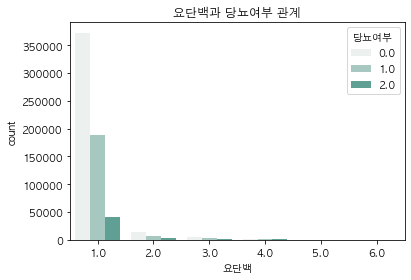

In [34]:
sns.color_palette("Set2")
sns.countplot(data=df1_clean, x='요단백', hue = '당뇨여부', palette='light:#5A9')
plt.title("요단백과 당뇨여부 관계")
plt.show()

## BMI 수치 (체중, 신장) 와 당뇨
    
||BMI|신체질량지수(BMI) = 체중(kg) / [신장(m)]^2|
|:---:|:---:|:---:|
||저체중|20미만|
||정상|20-24|
||과체중|25-29|
||비만|30이상|

- 분류 : 저체중, 정상 -> 0, 과체중 ->1, 비만 -> 2

In [35]:
df_weight = df1_clean[['신장(5Cm단위)', '체중(5Kg단위)']].copy()
temp = df_weight['신장(5Cm단위)']/100
df_bmi = round(df_weight['체중(5Kg단위)'] / (temp * temp), 1)
df_bmi2 = df_bmi.copy()
df_bmi.loc[df_bmi < 23] = 0
df_bmi.loc[(df_bmi >= 23) & (df_bmi < 25)] = 1
df_bmi.loc[df_bmi >= 25] = 2

In [36]:
df1_clean['BMI지수'] = df_bmi2
df1_clean['BMI'] = df_bmi
df1_clean = df1_clean.drop(['체중(5Kg단위)', '신장(5Cm단위)'], axis = 1)

In [37]:
df1_clean['BMI']

1         0.0
4         1.0
5         0.0
7         2.0
11        2.0
         ... 
999993    1.0
999994    2.0
999996    2.0
999997    2.0
999999    0.0
Name: BMI, Length: 641113, dtype: float64

In [38]:
a = df1_clean['BMI'].value_counts().sort_index()
x = a.index
y = a.values
pie = pyecharts.Pie("BMI지수","0(정상), 1(과체중), 2(비만)")
pie.add("BMI", x, y, center=[45,45], is_ramdom=True, radius=[30, 50], 
        rosetype='area', is_legend_show=False, is_label_show=True)
pie

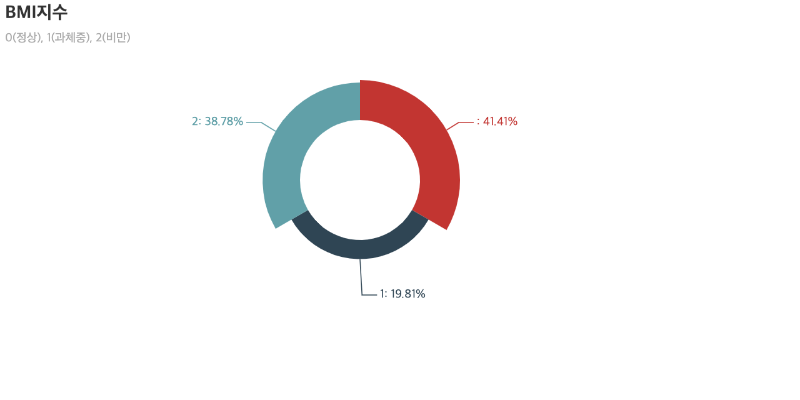

In [39]:
Image('pyecharts(김민상)/BMI지수.png')

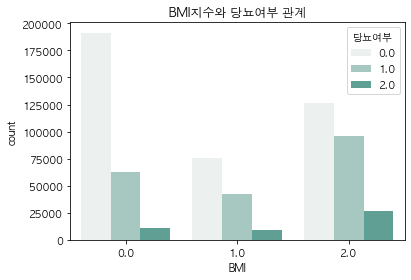

In [40]:
sns.countplot(data=df1_clean, x='BMI', hue = '당뇨여부', palette='light:#5A9')
plt.title("BMI지수와 당뇨여부 관계")
plt.show()

## 혈압과 당뇨
- 고혈압 : 수축기 혈압기준 140mmHg 이상 or 이완기 혈압 90mmHg 이상
- 0(정상), 1(고혈압)

In [41]:
Bp = df1_clean[['이완기혈압', '수축기혈압']].copy()
Bp

,이완기혈압,수축기혈압
1,78.0,128.0
4,62.0,114.0
5,83.0,136.0
7,71.0,137.0
11,88.0,144.0
...,...,...
999993,88.0,120.0
999994,78.0,118.0
999996,88.0,136.0
999997,90.0,162.0


In [42]:
Bp.loc[(Bp['수축기혈압'] >= 140) | (Bp['이완기혈압'] >= 90), '고혈압'] = 1
Bp.loc[(Bp['수축기혈압'] < 140) & (Bp['이완기혈압'] < 90), '고혈압'] = 0
df1_clean['고혈압'] = Bp['고혈압']

In [43]:
df1_clean['고혈압']

1         0.0
4         0.0
5         0.0
7         0.0
11        1.0
         ... 
999993    0.0
999994    0.0
999996    0.0
999997    1.0
999999    0.0
Name: 고혈압, Length: 641113, dtype: float64

In [44]:
a = df1_clean['고혈압'].value_counts().sort_index()
x = a.index
y = a.values
pie = pyecharts.Pie("고혈압","0(정상), 1(고혈압)")
pie.add("고혈압", x, y, center=[45,45], is_ramdom=True, radius=[30, 50], 
        rosetype='area', is_legend_show=False, is_label_show=True)
pie

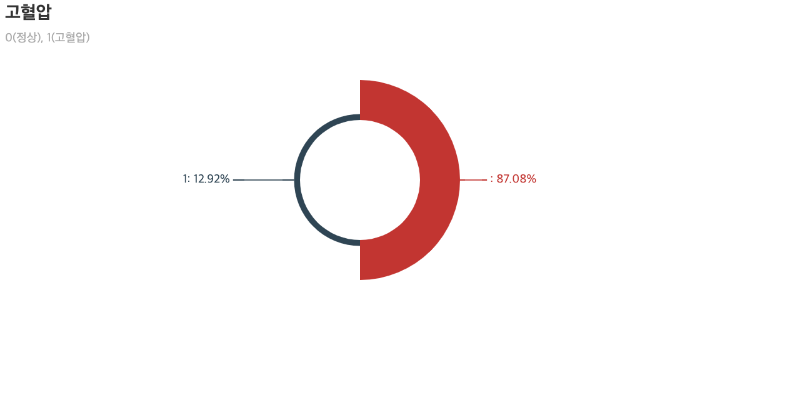

In [45]:
Image('pyecharts(김민상)/고혈압.png')

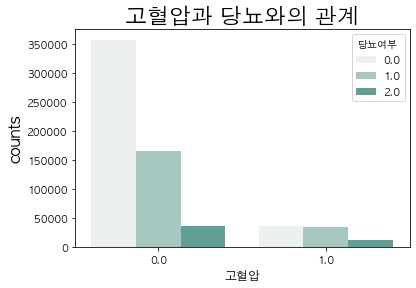

In [46]:
sns.countplot(data = df1_clean, x = '고혈압', hue = '당뇨여부', palette = 'light:#5A9')
plt.xlabel("고혈압",size=12)
plt.ylabel("counts", size=16)
plt.title("고혈압과 당뇨와의 관계", size = 22)
plt.show()

                   - 0.0(정상), 1.0(고혈압)

## 허리둘레와 당뇨
- 복부비만과 당뇨와의 관계
- 복부비만의 기준
    - 남자 : 90cm 이상, 여자 : 85cm 이상
    - 0(정상), 1(복부비만)

In [47]:
#비정상적인 값 배제
df1_clean = df1_clean.loc[df1_clean['허리둘레']<200]
df1_clean = df1_clean.loc[df1_clean['허리둘레']>40]

In [48]:
Ao = df1_clean[['성별코드', '허리둘레']].copy()

In [49]:
Ao.loc[(Ao['성별코드'] == 1) & (Ao['허리둘레'] >= 90), '복부비만'] = 1
Ao.loc[(Ao['성별코드'] == 2) & (Ao['허리둘레'] >= 85), '복부비만'] = 1
Ao.loc[(Ao['성별코드'] == 1) & (Ao['허리둘레'] < 90), '복부비만'] = 0
Ao.loc[(Ao['성별코드'] == 2) & (Ao['허리둘레'] < 85), '복부비만'] = 0
df1_clean['복부비만'] = Ao['복부비만']

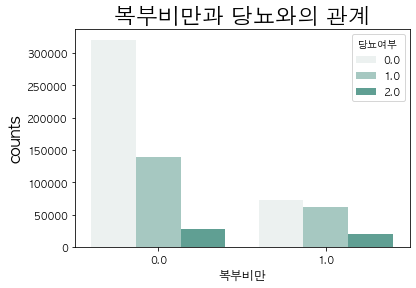

In [50]:
sns.countplot(data = df1_clean, x='복부비만', hue = '당뇨여부', palette = 'light:#5A9')
plt.xlabel("복부비만", size=12)
plt.ylabel("counts", size=16)
plt.title("복부비만과 당뇨와의 관계", size = 22)
plt.show()

                   - 0.0(정상), 1.0(복부비만)

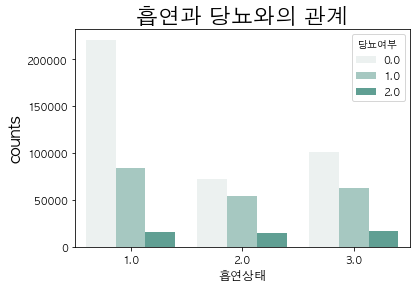

In [51]:
sns.countplot(data = df1_clean, x = '흡연상태', hue = '당뇨여부', palette = 'light:#5A9')
plt.xlabel("흡연상태", size = 12)
plt.ylabel("counts", size = 16)
plt.title("흡연과 당뇨와의 관계", size = 22)
plt.show()

    - 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)